# Exploritory Data Analysis

In [6]:
# Install datasets Library (if not already installed)
# !pip install datasets

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Filter for US Data Analyst Roles


In [7]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

In [18]:
df_plot = df_DA_US['job_location'].value_counts().head(10).reset_index()
df_plot.columns = ['job_location', 'count']

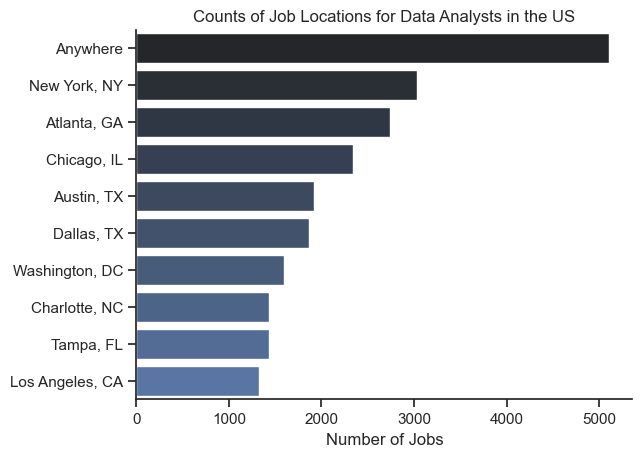

In [30]:
sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='count', y='job_location', palette='dark:b')
sns.despine()
plt.title('Counts of Job Locations for Data Analysts in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

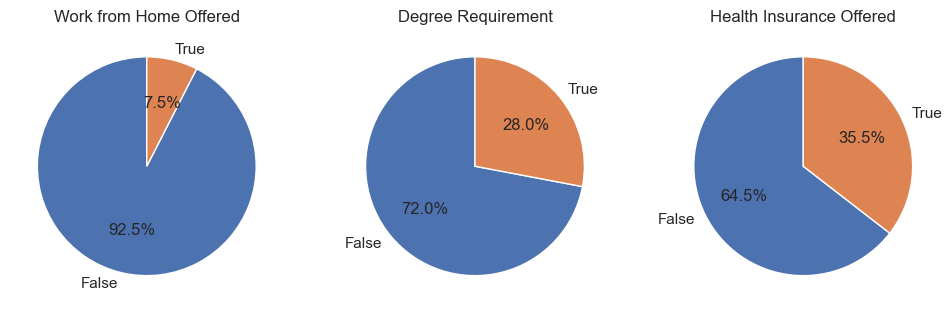

In [31]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

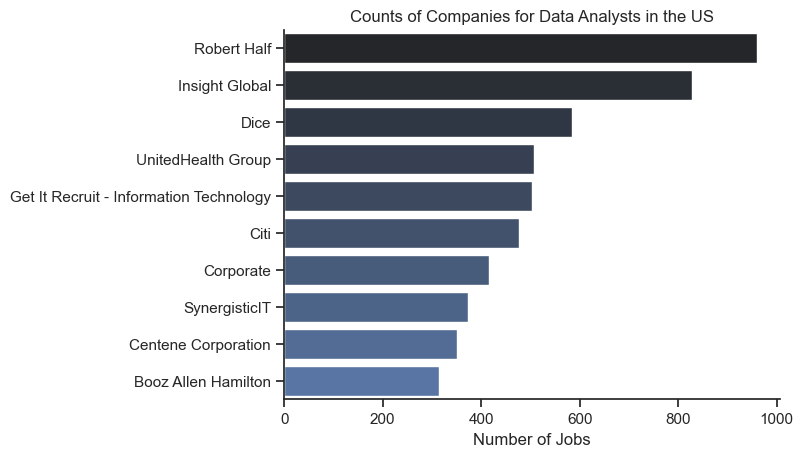

In [32]:
df_plot_name = df_DA_US['company_name'].value_counts().head(10).reset_index()
df_plot_name.columns = ['company_name', 'count']

sns.set_theme(style='ticks')
sns.barplot(data = df_plot_name, x='count', y='company_name', palette='dark:b')
sns.despine()
plt.title('Counts of Companies for Data Analysts in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()